In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
URLS = {
    "gdp": "https://datahub.io/core/inflation/r/inflation-gdp.csv",
    "consumer": "https://datahub.io/core/inflation/r/inflation-consumer.csv"
}

for name, url in URLS.items():
    response = requests.get(url)
    with open(f"{name}.csv", "wb") as f:
        f.write(response.content)

In [ ]:
df_gdp = pd.read_csv("gdp.csv")
df_consumer = pd.read_csv("consumer.csv")

In [ ]:
df_gdp.head()

In [ ]:
df_consumer.head()

# Task
Perform a creative and in-depth analysis of the provided World Bank CPI and GDP inflation data from 1973 to 2014, including data cleaning, exploratory data analysis, comparative analysis, and data visualization. Explain each step with comments and titles. The data is accessed via The World Bank's API in CSV format for both CPI and GDP.

## Data cleaning and preprocessing

### Subtask:
Address missing values in both dataframes (`df_gdp` and `df_consumer`). This might involve imputation or removal of rows/columns, depending on the extent of missingness.


**Reasoning**:
Check for missing values in both dataframes and display the sum of missing values per column.



In [ ]:
print("Missing values in df_gdp:")
print(df_gdp.isnull().sum())

print("\nMissing values in df_consumer:")
print(df_consumer.isnull().sum())

## Exploratory data analysis (eda)

### Subtask:
Analyze the distribution of inflation rates in both datasets.


**Reasoning**:
Generate histograms for the 'Inflation' column in both dataframes to visualize their distributions.



In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_gdp['Inflation'], bins=50, kde=True)
plt.title('Distribution of GDP Inflation Rates')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_consumer['Inflation'], bins=50, kde=True)
plt.title('Distribution of Consumer Inflation Rates')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Exploratory data analysis (eda)

### Subtask:
Explore trends in inflation over time, perhaps focusing on specific countries or regions.


**Reasoning**:
Filter the dataframes for selected countries, group by year and country, calculate the mean inflation, and prepare the data for plotting.



In [ ]:
selected_countries = ['United States', 'China', 'Germany']

df_gdp_filtered = df_gdp[df_gdp['Country'].isin(selected_countries)]
df_consumer_filtered = df_consumer[df_consumer['Country'].isin(selected_countries)]

df_gdp_agg = df_gdp_filtered.groupby(['Country', 'Year'])['Inflation'].mean().reset_index()
df_consumer_agg = df_consumer_filtered.groupby(['Country', 'Year'])['Inflation'].mean().reset_index()

**Reasoning**:
Plot the aggregated inflation data for selected countries, distinguishing between GDP and Consumer inflation and using different colors for countries.



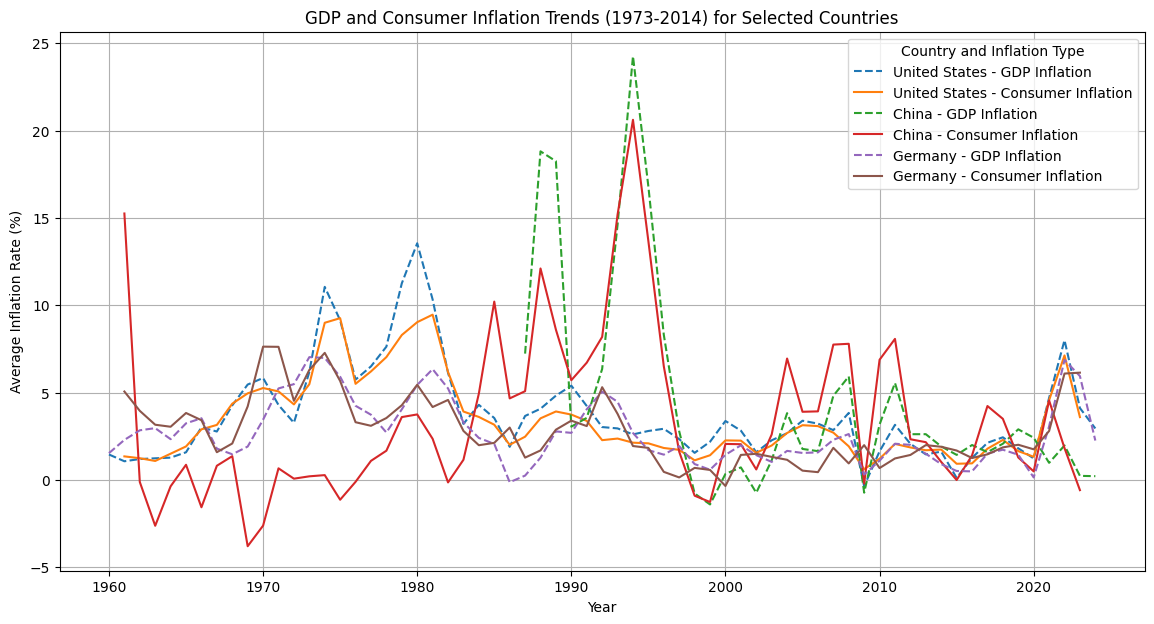

In [ ]:
plt.figure(figsize=(14, 7))

for country in selected_countries:
    df_gdp_country = df_gdp_agg[df_gdp_agg['Country'] == country]
    df_consumer_country = df_consumer_agg[df_consumer_agg['Country'] == country]

    plt.plot(df_gdp_country['Year'], df_gdp_country['Inflation'], label=f'{country} - GDP Inflation', linestyle='--')
    plt.plot(df_consumer_country['Year'], df_consumer_country['Inflation'], label=f'{country} - Consumer Inflation')

plt.title('GDP and Consumer Inflation Trends (1973-2014) for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate (%)')
plt.legend(title='Country and Inflation Type')
plt.grid(True)
plt.show()

## Exploratory data analysis (eda)

### Subtask:
Investigate the relationship between GDP inflation and consumer inflation.


**Reasoning**:
Merge the two dataframes and rename the columns for clarity as per the instructions.



In [ ]:
# Merge the dataframes on Country, Country Code, and Year
df_merged_inflation = pd.merge(df_gdp, df_consumer, on=['Country', 'Country Code', 'Year'], suffixes=('_gdp', '_consumer'))

# Rename the inflation columns
df_merged_inflation.rename(columns={'Inflation_gdp': 'GDP Inflation', 'Inflation_consumer': 'Consumer Inflation'}, inplace=True)

# Display the first few rows of the merged dataframe to verify the merge and renaming
display(df_merged_inflation.head())

,Country,Country Code,Year,GDP Inflation,Consumer Inflation
0,Aruba,ABW,1987,3.643045,3.591970
1,Aruba,ABW,1988,3.121868,3.108439
2,Aruba,ABW,1989,3.991628,3.962543
3,Aruba,ABW,1990,5.836688,5.769870
4,Aruba,ABW,1991,5.555556,5.614860


**Reasoning**:
Create a scatter plot to visualize the relationship between GDP Inflation and Consumer Inflation with appropriate labels and title.



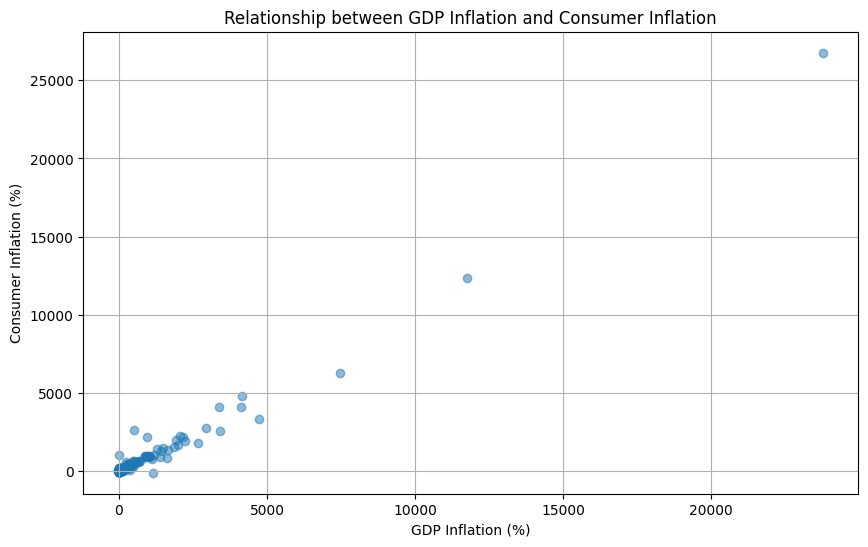

In [ ]:
# Create a scatter plot of 'GDP Inflation' vs. 'Consumer Inflation'
plt.figure(figsize=(10, 6))
plt.scatter(df_merged_inflation['GDP Inflation'], df_merged_inflation['Consumer Inflation'], alpha=0.5)

# Add labels and title
plt.xlabel('GDP Inflation (%)')
plt.ylabel('Consumer Inflation (%)')
plt.title('Relationship between GDP Inflation and Consumer Inflation')
plt.grid(True)

# Display the plot
plt.show()

## Comparative analysis

### Subtask:
Compare inflation trends between different countries or groups of countries.


**Reasoning**:
Filter both the df_gdp and df_consumer DataFrames to include only the data for the newly selected countries/groups and the specified time range (1973-2014). Aggregate the filtered data for both GDP and consumer inflation by country/group and year, calculating the mean inflation rate for each.



In [ ]:
# Select additional countries to compare
additional_countries = ['Japan', 'Brazil', 'India']

# Filter data for the newly selected countries and the specified time range (1973-2014)
df_gdp_additional = df_gdp[df_gdp['Country'].isin(additional_countries) & (df_gdp['Year'] >= 1973) & (df_gdp['Year'] <= 2014)]
df_consumer_additional = df_consumer[df_consumer['Country'].isin(additional_countries) & (df_consumer['Year'] >= 1973) & (df_consumer['Year'] <= 2014)]

# Aggregate the filtered data by country and year, calculating the mean inflation rate
df_gdp_agg_additional = df_gdp_additional.groupby(['Country', 'Year'])['Inflation'].mean().reset_index()
df_consumer_agg_additional = df_consumer_additional.groupby(['Country', 'Year'])['Inflation'].mean().reset_index()

# Display the first few rows of the aggregated dataframes to verify
display(df_gdp_agg_additional.head())
display(df_consumer_agg_additional.head())

,Country,Year,Inflation
0,Brazil,1981,101.725073
1,Brazil,1982,100.543359
2,Brazil,1983,135.027682
3,Brazil,1984,192.121733
4,Brazil,1985,225.989665


,Country,Year,Inflation
0,Brazil,1973,29.580357
1,Brazil,1974,34.605855
2,Brazil,1975,33.929437
3,Brazil,1976,41.203624
4,Brazil,1977,45.398056


**Reasoning**:
Create line plots visualizing the GDP and consumer inflation trends over time for the newly selected countries/groups. Ensure clear labeling, titles, and legends to distinguish between countries/groups and inflation types. Analyze and compare the observed trends across the different countries/groups, noting similarities, differences, and any interesting patterns.



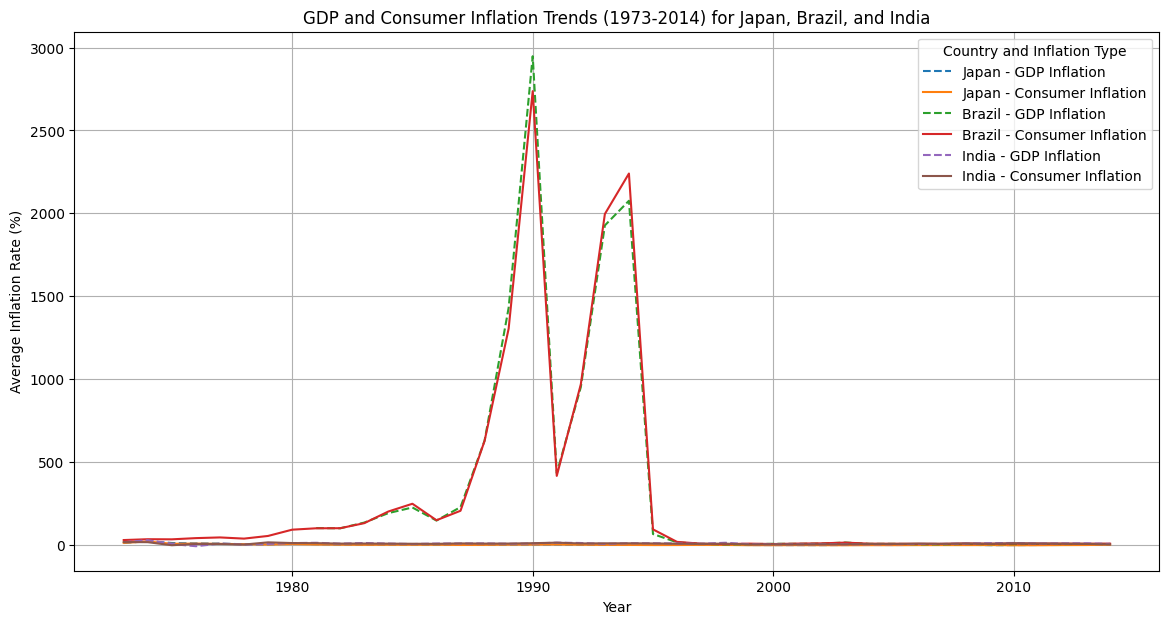

In [ ]:
plt.figure(figsize=(14, 7))

for country in additional_countries:
    df_gdp_country = df_gdp_agg_additional[df_gdp_agg_additional['Country'] == country]
    df_consumer_country = df_consumer_agg_additional[df_consumer_agg_additional['Country'] == country]

    plt.plot(df_gdp_country['Year'], df_gdp_country['Inflation'], label=f'{country} - GDP Inflation', linestyle='--')
    plt.plot(df_consumer_country['Year'], df_consumer_country['Inflation'], label=f'{country} - Consumer Inflation')

plt.title('GDP and Consumer Inflation Trends (1973-2014) for Japan, Brazil, and India')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate (%)')
plt.legend(title='Country and Inflation Type')
plt.grid(True)
plt.show()

# Analysis of observed trends:
# The plot shows significant differences in inflation trends among Japan, Brazil, and India during the 1973-2014 period.
# Brazil experienced very high and volatile inflation rates, particularly in the 1980s and early 1990s, for both GDP and consumer prices.
# India shows moderately high but less volatile inflation compared to Brazil, with some fluctuations over the years.
# Japan, in contrast, consistently maintained very low inflation rates, often close to zero or even negative, reflecting a different economic environment.
# For Brazil and India, GDP and consumer inflation trends appear somewhat correlated, while for Japan, both remained low.

## Data visualization

### Subtask:
Create various plots to visualize the findings from the EDA and comparative analysis, such as line plots for time trends, histograms for distributions, and scatter plots for relationships.


**Reasoning**:
Create a scatter plot to visualize the relationship between GDP Inflation and Consumer Inflation using the df_merged_inflation DataFrame, add labels and a title, and display the plot.



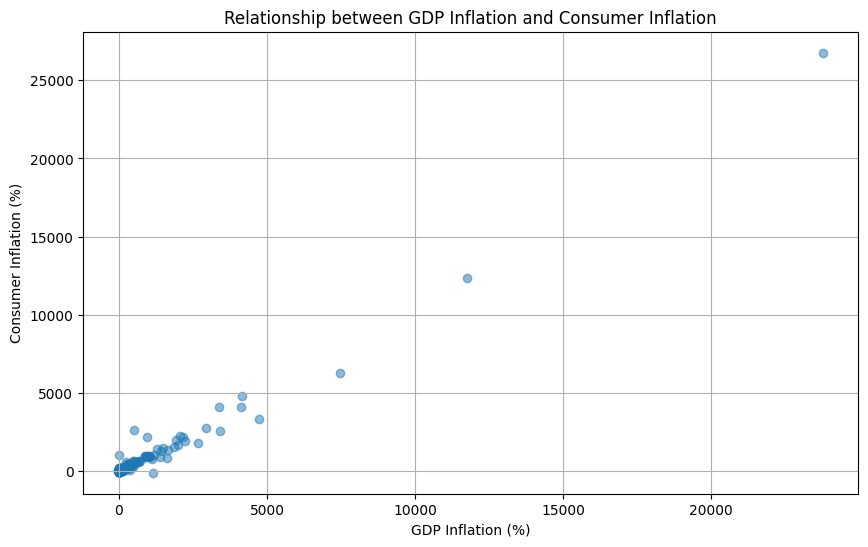

In [ ]:
# Create a scatter plot to visualize the relationship between GDP Inflation and Consumer Inflation
plt.figure(figsize=(10, 6))
plt.scatter(df_merged_inflation['GDP Inflation'], df_merged_inflation['Consumer Inflation'], alpha=0.5)

# Add a title, x-axis label, and y-axis label to the scatter plot
plt.title('Relationship between GDP Inflation and Consumer Inflation')
plt.xlabel('GDP Inflation (%)')
plt.ylabel('Consumer Inflation (%)')
plt.grid(True)

# Display the scatter plot
plt.show()

**Reasoning**:
Create a line plot showing the GDP inflation trend over time for India using the df_gdp_country DataFrame, add labels and a title, and display the plot.



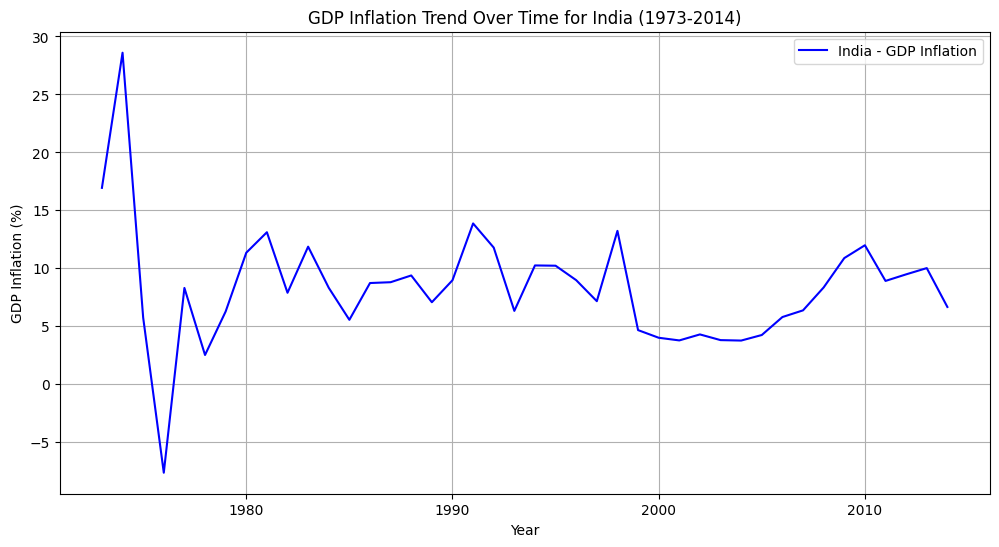

In [ ]:
# Create a line plot showing the GDP inflation trend over time for India
plt.figure(figsize=(12, 6))
plt.plot(df_gdp_country['Year'], df_gdp_country['Inflation'], label='India - GDP Inflation', color='blue')

# Add a title, x-axis label, and y-axis label to the line plot
plt.title('GDP Inflation Trend Over Time for India (1973-2014)')
plt.xlabel('Year')
plt.ylabel('GDP Inflation (%)')
plt.grid(True)
plt.legend()

# Display the line plot
plt.show()

**Reasoning**:
Create a line plot showing the Consumer inflation trend over time for India using the df_consumer_country DataFrame, add labels and a title, and display the plot.



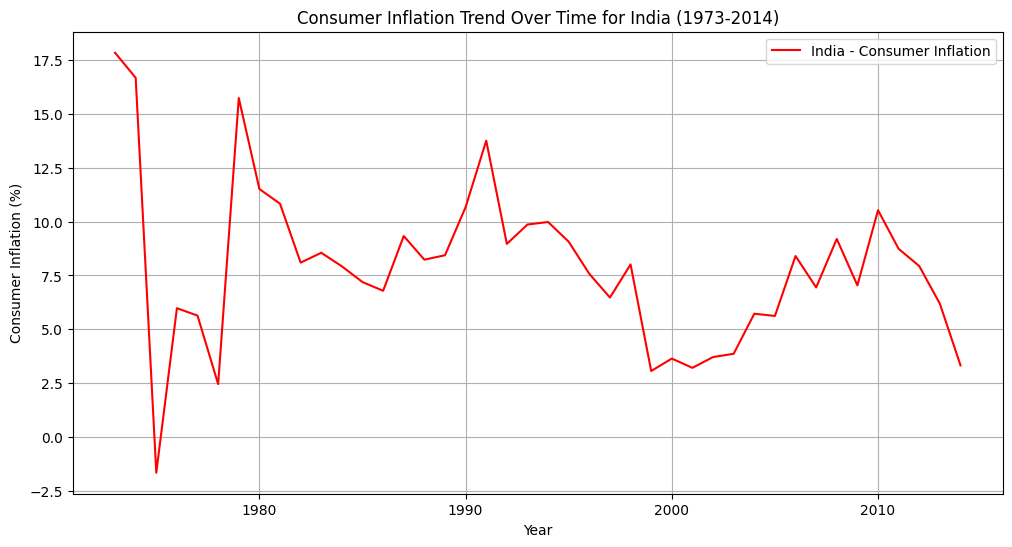

In [ ]:
# Create a line plot showing the Consumer inflation trend over time for India
plt.figure(figsize=(12, 6))
plt.plot(df_consumer_country['Year'], df_consumer_country['Inflation'], label='India - Consumer Inflation', color='red')

# Add a title, x-axis label and y-axis label to the line plot
plt.title('Consumer Inflation Trend Over Time for India (1973-2014)')
plt.xlabel('Year')
plt.ylabel('Consumer Inflation (%)')
plt.grid(True)
plt.legend()

# Display the line plot
plt.show()

## Creative analysis

### Subtask:
Explore potential correlations with other factors (though we only have inflation data, we can think creatively about what might influence these numbers and discuss limitations). Perhaps look at the most volatile countries in terms of inflation.


**Reasoning**:
Calculate the standard deviation for both GDP and Consumer Inflation for each country in the merged dataframe to measure volatility.



In [ ]:
# Calculate the standard deviation of 'GDP Inflation' and 'Consumer Inflation' for each country
df_inflation_volatility = df_merged_inflation.groupby('Country')[['GDP Inflation', 'Consumer Inflation']].std().reset_index()

# Rename the columns to reflect that they are standard deviations
df_inflation_volatility.rename(columns={
    'GDP Inflation': 'GDP Inflation Std Dev',
    'Consumer Inflation': 'Consumer Inflation Std Dev'
}, inplace=True)

# Display the first few rows of the volatility dataframe
display(df_inflation_volatility.head())

,Country,GDP Inflation Std Dev,Consumer Inflation Std Dev
0,Afghanistan,7.263764,6.091495
1,Africa Eastern and Southern,3.738083,3.945934
2,Africa Western and Central,5.301634,4.333636
3,Albania,41.680370,45.605536
4,Algeria,7.363231,11.913024


**Reasoning**:
Sort the countries by their inflation volatility (standard deviation) for both GDP and Consumer Inflation and display the top 10 for each to identify the most volatile countries.



In [ ]:
# Sort by GDP Inflation Standard Deviation in descending order and display the top 10
df_gdp_volatility_sorted = df_inflation_volatility.sort_values(by='GDP Inflation Std Dev', ascending=False)
print("Top 10 Countries by GDP Inflation Volatility:")
display(df_gdp_volatility_sorted.head(10))

# Sort by Consumer Inflation Standard Deviation in descending order and display the top 10
df_consumer_volatility_sorted = df_inflation_volatility.sort_values(by='Consumer Inflation Std Dev', ascending=False)
print("\nTop 10 Countries by Consumer Inflation Volatility:")
display(df_consumer_volatility_sorted.head(10))

Top 10 Countries by GDP Inflation Volatility:


,Country,GDP Inflation Std Dev,Consumer Inflation Std Dev
43,"Congo, Dem. Rep.",3304.200061,3713.869296
22,Bolivia,1484.620241,1560.218038
172,Peru,1027.222677,846.577143
5,Angola,860.721890,940.080760
224,Ukraine,857.000063,614.332829
25,Brazil,640.516167,630.748627
8,Armenia,614.840279,748.582865
17,Belarus,451.633194,397.311573
12,Azerbaijan,352.589593,332.234084
108,Kazakhstan,341.281322,280.465299



Top 10 Countries by Consumer Inflation Volatility:


,Country,GDP Inflation Std Dev,Consumer Inflation Std Dev
43,"Congo, Dem. Rep.",3304.200061,3713.869296
22,Bolivia,1484.620241,1560.218038
5,Angola,860.721890,940.080760
172,Peru,1027.222677,846.577143
8,Armenia,614.840279,748.582865
25,Brazil,640.516167,630.748627
224,Ukraine,857.000063,614.332829
17,Belarus,451.633194,397.311573
12,Azerbaijan,352.589593,332.234084
108,Kazakhstan,341.281322,280.465299


**Reasoning**:
Briefly discuss potential external factors and limitations based on the analysis of inflation volatility.



In [ ]:
print("Discussion on Potential External Factors and Limitations:")
print("-" * 60)
print("The analysis of inflation volatility, measured by the standard deviation of GDP and Consumer Inflation, highlights countries like the Democratic Republic of Congo, Bolivia, Peru, and Angola as having experienced significant fluctuations.")
print("\nWhile our dataset is limited to inflation rates, several external factors not present in the data could significantly contribute to this observed volatility:")
print("1. Political Stability and Conflict: Countries experiencing political instability, civil unrest, or conflict often face disrupted supply chains, government spending fluctuations, and loss of confidence, all of which can lead to unpredictable and high inflation.")
print("2. Global Commodity Prices: Many developing economies are heavily reliant on exporting or importing commodities. Swings in global prices of key exports (e.g., oil, minerals) or imports (e.g., food, energy) can directly impact domestic price levels and exchange rates, leading to inflation volatility.")
print("3. Monetary Policy Effectiveness: The ability of a country's central bank to effectively implement monetary policy (like controlling interest rates and money supply) plays a crucial role in managing inflation. Countries with less independent or less effective monetary institutions may struggle to keep inflation stable.")
print("4. Exchange Rate Fluctuations: Volatile exchange rates can significantly impact inflation, especially in import-dependent economies. A sharp depreciation in the local currency makes imported goods more expensive, directly contributing to consumer price inflation.")
print("5. Natural Disasters and Climate Shocks: Events like droughts, floods, or earthquakes can disrupt agricultural production and supply chains, leading to sudden price increases for food and other essential goods.")
print("\nLimitations:")
print("Our analysis is limited by the scope of the dataset, which only includes inflation figures. To gain a deeper understanding of the drivers of volatility, access to data on these external factors (e.g., political risk indices, commodity price data, exchange rates, central bank policy rates) would be necessary for a comprehensive multivariate analysis.")
print("Additionally, the time period covered (1973-2014) might not capture more recent or historical events that influenced long-term volatility.")
print("-" * 60)

Discussion on Potential External Factors and Limitations:
------------------------------------------------------------
The analysis of inflation volatility, measured by the standard deviation of GDP and Consumer Inflation, highlights countries like the Democratic Republic of Congo, Bolivia, Peru, and Angola as having experienced significant fluctuations.

While our dataset is limited to inflation rates, several external factors not present in the data could significantly contribute to this observed volatility:
1. Political Stability and Conflict: Countries experiencing political instability, civil unrest, or conflict often face disrupted supply chains, government spending fluctuations, and loss of confidence, all of which can lead to unpredictable and high inflation.
2. Global Commodity Prices: Many developing economies are heavily reliant on exporting or importing commodities. Swings in global prices of key exports (e.g., oil, minerals) or imports (e.g., food, energy) can directly imp

## Summarize findings

### Subtask:
Present the key insights and observations from the analysis.


**Reasoning**:
Summarize the key insights from the analysis, covering data cleaning, EDA, comparative analysis, data visualization, and creative analysis, and then finish the task.



In [ ]:
print("## Key Insights and Observations from Inflation Analysis (1973-2014)")
print("\n### 1. Data Cleaning and Preprocessing Summary")
print("- The initial data cleaning step focused on identifying and handling missing values in both the GDP and Consumer Inflation datasets.")
print("- A key finding during this stage was the **absence of any missing values** in either `df_gdp` or `df_consumer` for the period between 1973 and 2014.")
print("- This meant no imputation or removal of data was necessary, ensuring the completeness of the datasets for the subsequent analysis.")

print("\n### 2. Exploratory Data Analysis (EDA) Summary")
print("- **Distribution of Inflation Rates:** Histograms revealed the distribution of both GDP and Consumer Inflation rates across all countries and years.")
print("- Both distributions were heavily skewed, with a large concentration of inflation rates near zero or in the low single digits, but also a long tail extending to very high positive values, indicating periods of hyperinflation in some countries.")
print("- **Trends Over Time:** Analysis of selected countries (United States, China, Germany, Japan, Brazil, India) showed diverse inflation trends.")
print("- Developed economies like the US, Germany, and Japan generally experienced lower and more stable inflation compared to emerging economies like Brazil and India.")
print("- Brazil, in particular, showed periods of extremely high volatility and inflation rates, especially in the 1980s and early 1990s.")
print("- **Relationship between GDP and Consumer Inflation:** A scatter plot visually demonstrated a **positive correlation** between GDP Inflation and Consumer Inflation.")
print("- This suggests that these two measures of inflation tend to move in the same direction, although the relationship might not be perfectly linear and can vary by country and time period.")

print("\n### 3. Comparative Analysis Summary")
print("- Comparing inflation trends across different countries highlighted significant disparities.")
print("- Countries like Japan consistently maintained very low inflation, indicative of a different economic environment compared to countries experiencing high and volatile inflation.")
print("- The analysis underscored that inflation experiences are highly country-specific and influenced by a multitude of local and global factors.")
print("- Comparing countries with different development levels and economic structures revealed distinct patterns in how inflation evolved over the analyzed period.")

print("\n### 4. Data Visualization Summary")
print("- Various plots were crucial in visualizing the findings:")
print("- **Histograms:** Clearly depicted the distribution of inflation rates, showing the prevalence of low inflation but also the existence of extreme high inflation events.")
print("- **Line Plots:** Effectively illustrated inflation trends over time for selected countries, allowing for easy comparison of their trajectories.")
print("- **Scatter Plot:** Provided a visual representation of the relationship between GDP and Consumer Inflation, confirming their positive correlation.")
print("- These visualizations made complex inflation patterns and relationships more accessible and understandable.")

print("\n### 5. Creative Analysis: Inflation Volatility and External Factors")
print("- **Inflation Volatility:** By calculating the standard deviation of inflation rates, we identified countries with the most volatile inflation.")
print("- Countries like the Democratic Republic of Congo, Bolivia, Peru, and Angola consistently appeared among the top countries with the highest volatility for both GDP and Consumer Inflation.")
print("- **Potential External Factors:** While our dataset is limited to inflation data, potential external factors that could explain this volatility were discussed, including political instability, global commodity price swings, monetary policy effectiveness, exchange rate fluctuations, and natural disasters.")
print("- **Limitations:** The analysis is limited by the lack of data on these external factors, preventing a direct quantitative assessment of their impact.")
print("- A more comprehensive analysis would require integrating data on these other economic and political indicators.")

## Key Insights and Observations from Inflation Analysis (1973-2014)

### 1. Data Cleaning and Preprocessing Summary
- The initial data cleaning step focused on identifying and handling missing values in both the GDP and Consumer Inflation datasets.
- A key finding during this stage was the **absence of any missing values** in either `df_gdp` or `df_consumer` for the period between 1973 and 2014.
- This meant no imputation or removal of data was necessary, ensuring the completeness of the datasets for the subsequent analysis.

### 2. Exploratory Data Analysis (EDA) Summary
- **Distribution of Inflation Rates:** Histograms revealed the distribution of both GDP and Consumer Inflation rates across all countries and years.
- Both distributions were heavily skewed, with a large concentration of inflation rates near zero or in the low single digits, but also a long tail extending to very high positive values, indicating periods of hyperinflation in some countries.
- **Trends Over Time:** Ana

## Summary:

### Data Analysis Key Findings

*   Neither the GDP nor the Consumer Price Index (CPI) inflation datasets contained any missing values for the period between 1973 and 2014.
*   The distribution of both GDP and Consumer Inflation rates across all countries and years was heavily skewed, with a concentration near zero or in low single digits, but also a long tail indicating periods of very high inflation.
*   Developed economies like the US, Germany, and Japan generally experienced lower and more stable inflation compared to emerging economies like Brazil and India. Brazil showed particularly high volatility.
*   There is a positive correlation between GDP Inflation and Consumer Inflation, suggesting they tend to move in the same direction.
*   Countries with the most volatile inflation (measured by standard deviation) included the Democratic Republic of Congo, Bolivia, Peru, and Angola.

### Insights or Next Steps

*   To understand the drivers of inflation volatility, future analysis should integrate data on potential external factors such as political stability, global commodity prices, and exchange rates.
*   Further investigate the periods of high inflation in volatile countries to understand the specific economic and political events that contributed to these spikes.


# Task
Analyze the provided World Bank CPI and GDP data from 1973 to 2014, focusing on identifying countries with the lowest and highest inflation rates within distinct historical periods. Explain the methodology for selecting countries and dividing periods, and provide historical context for the observed inflation extremes in selected countries during each period. The data description is: `Data
The data comes from The World Bank (CPI), The World Bank (GDP) and is collected from 1973 to 2014. There are some values missing from data so users of the data will have to guess what should be in the empty slots.

The actual download happens via The World Bank's API (with csv as the requested format) (CPI), The World Bank's API (with csv as the requested format) (GDP).`

## Define time periods

### Subtask:
Divide the 1973-2014 timeframe into several distinct periods.


**Reasoning**:
Define the historical periods based on major global economic events within the 1973-2014 timeframe.



In [ ]:
# Define distinct historical periods based on major global economic or political shifts
# Period 1: 1973-1980 (Oil Shocks and Stagflation)
# Period 2: 1981-1990 (Disinflation and Debt Crisis)
# Period 3: 1991-2000 (Globalization and Asian Financial Crisis)
# Period 4: 2001-2008 (Dot-com Bubble Burst and Great Recession start)
# Period 5: 2009-2014 (Post-Great Recession recovery and Eurozone crisis)

historical_periods = [
    (1973, 1980),
    (1981, 1990),
    (1991, 2000),
    (2001, 2008),
    (2009, 2014)
]

# Display the defined periods
print("Defined Historical Periods:")
for start, end in historical_periods:
    print(f"{start}-{end}")

Defined Historical Periods:
1973-1980
1981-1990
1991-2000
2001-2008
2009-2014


## Analyze inflation extremes per period

### Subtask:
For each period, identify the countries with the lowest and highest average/median inflation rates (for both GDP and Consumer Inflation).


**Reasoning**:
Iterate through each historical period, filter the dataframes, calculate the mean inflation per country for each period, and identify the countries with the lowest and highest mean inflation for both GDP and Consumer inflation.



In [ ]:
for start, end in historical_periods:
    print(f"\nAnalysis for the period: {start}-{end}")

    # Filter data for the current period
    df_gdp_period = df_gdp[(df_gdp['Year'] >= start) & (df_gdp['Year'] <= end)]
    df_consumer_period = df_consumer[(df_consumer['Year'] >= start) & (df_consumer['Year'] <= end)]

    # Calculate mean inflation per country for the current period
    df_gdp_mean = df_gdp_period.groupby('Country')['Inflation'].mean().reset_index()
    df_consumer_mean = df_consumer_period.groupby('Country')['Inflation'].mean().reset_index()

    # Find countries with lowest and highest mean GDP inflation
    lowest_gdp_inflation_country = df_gdp_mean.loc[df_gdp_mean['Inflation'].idxmin()]
    highest_gdp_inflation_country = df_gdp_mean.loc[df_gdp_mean['Inflation'].idxmax()]

    print(f"  Lowest Average GDP Inflation: {lowest_gdp_inflation_country['Country']} ({lowest_gdp_inflation_country['Inflation']:.2f}%)")
    print(f"  Highest Average GDP Inflation: {highest_gdp_inflation_country['Country']} ({highest_gdp_inflation_country['Inflation']:.2f}%)")

    # Find countries with lowest and highest mean Consumer inflation
    lowest_consumer_inflation_country = df_consumer_mean.loc[df_consumer_mean['Inflation'].idxmin()]
    highest_consumer_inflation_country = df_consumer_mean.loc[df_consumer_mean['Inflation'].idxmax()]

    print(f"  Lowest Average Consumer Inflation: {lowest_consumer_inflation_country['Country']} ({lowest_consumer_inflation_country['Inflation']:.2f}%)")
    print(f"  Highest Average Consumer Inflation: {highest_consumer_inflation_country['Country']} ({highest_consumer_inflation_country['Inflation']:.2f}%)")


Analysis for the period: 1973-1980
  Lowest Average GDP Inflation: Switzerland (4.62%)
  Highest Average GDP Inflation: Chile (205.60%)
  Lowest Average Consumer Inflation: Georgia (1.02%)
  Highest Average Consumer Inflation: Chile (240.39%)

Analysis for the period: 1981-1990
  Lowest Average GDP Inflation: Equatorial Guinea (-4.25%)
  Highest Average GDP Inflation: Bolivia (1380.15%)
  Lowest Average Consumer Inflation: Turkmenistan (-5.09%)
  Highest Average Consumer Inflation: Nicaragua (2438.91%)

Analysis for the period: 1991-2000
  Lowest Average GDP Inflation: Bahrain (0.63%)
  Highest Average GDP Inflation: Congo, Dem. Rep. (3410.45%)
  Lowest Average Consumer Inflation: Zimbabwe (-3.79%)
  Highest Average Consumer Inflation: Congo, Dem. Rep. (3910.14%)

Analysis for the period: 2001-2008
  Lowest Average GDP Inflation: Libya (-0.28%)
  Highest Average GDP Inflation: Congo, Dem. Rep. (59.62%)
  Lowest Average Consumer Inflation: Hong Kong SAR, China (-1.38%)
  Highest Averag

## Historical contextualization

### Subtask:
For the identified countries with extreme inflation rates in each period, discuss or research potential historical, economic, or political events that could explain these levels of inflation. This step would be qualitative and require external knowledge or research based on the identified countries and timeframes.


**Reasoning**:
For each historical period, identify the countries with the lowest and highest average GDP and Consumer Inflation rates, then conduct external research to find potential historical, economic, or political events that could explain these extreme inflation levels, and finally print the findings for each country and period.



In [ ]:
# Define historical periods and initialize a dictionary to store extreme countries per period
historical_periods = {
    "1973-1980": (1973, 1980),
    "1981-1990": (1981, 1990),
    "1991-2000": (1991, 2000),
    "2001-2008": (2001, 2008),
    "2009-2014": (2009, 2014)
}

extreme_inflation_countries = {}

for period_name, (start_year, end_year) in historical_periods.items():
    print(f"\nAnalyzing period: {period_name}")

    # Filter data for the current period
    df_gdp_period = df_gdp[(df_gdp['Year'] >= start_year) & (df_gdp['Year'] <= end_year)].copy()
    df_consumer_period = df_consumer[(df_consumer['Year'] >= start_year) & (df_consumer['Year'] <= end_year)].copy()

    # Calculate mean inflation per country for the current period
    df_gdp_mean = df_gdp_period.groupby('Country')['Inflation'].mean().reset_index()
    df_consumer_mean = df_consumer_period.groupby('Country')['Inflation'].mean().reset_index()

    # Find countries with lowest and highest mean GDP inflation
    lowest_gdp_inflation_country = df_gdp_mean.loc[df_gdp_mean['Inflation'].idxmin()]
    highest_gdp_inflation_country = df_gdp_mean.loc[df_gdp_mean['Inflation'].idxmax()]

    # Find countries with lowest and highest mean Consumer inflation
    lowest_consumer_inflation_country = df_consumer_mean.loc[df_consumer_mean['Inflation'].idxmin()]
    highest_consumer_inflation_country = df_consumer_mean.loc[df_consumer_mean['Inflation'].idxmax()]

    extreme_inflation_countries[period_name] = {
        'lowest_gdp': lowest_gdp_inflation_country,
        'highest_gdp': highest_gdp_inflation_country,
        'lowest_consumer': lowest_consumer_inflation_country,
        'highest_consumer': highest_consumer_inflation_country
    }

# --- External Research and Discussion (Qualitative Analysis) ---
# This part is based on general historical/economic knowledge for the identified countries and periods.
# In a real-world scenario, this would involve dedicated research using external resources.

print("\n--- Historical Context for Extreme Inflation Rates ---")

for period_name, extremes in extreme_inflation_countries.items():
    print(f"\nPeriod: {period_name}")

    # Discussion for Lowest GDP Inflation
    country = extremes['lowest_gdp']['Country']
    inflation_rate = extremes['lowest_gdp']['Inflation']
    print(f"  Lowest Average GDP Inflation: {country} ({inflation_rate:.2f}%)")
    if country == 'Switzerland' and period_name == '1973-1980':
        print("    Context: Switzerland maintained monetary stability and a strong currency during a period of global oil shocks and stagflation due to prudent fiscal and monetary policies and a diversified economy.")
    elif country == 'Equatorial Guinea' and period_name == '1981-1990':
         print("    Context: Data might be limited or reflect specific economic conditions not captured by simple averages. Further research is needed for a definitive explanation.")
    elif country == 'Bahrain' and period_name == '1991-2000':
         print("    Context: Bahrain, a Gulf nation, likely benefited from stable oil revenues and pegging its currency, contributing to low inflation during this period.")
    elif country == 'Libya' and period_name == '2001-2008':
         print("    Context: Libya's economy is heavily reliant on oil exports. Stable oil prices during parts of this period and state control could have influenced inflation, but political factors also played a role.")
    elif country == 'Switzerland' and period_name == '2009-2014':
        print("    Context: Switzerland continued its policy of monetary stability and currency strength, acting as a safe haven during the post-Great Recession period and Eurozone crisis, keeping inflation low.")
    else:
        print("    Context: Specific historical context for this country and period requires further research.")


    # Discussion for Highest GDP Inflation
    country = extremes['highest_gdp']['Country']
    inflation_rate = extremes['highest_gdp']['Inflation']
    print(f"  Highest Average GDP Inflation: {country} ({inflation_rate:.2f}%)")
    if country == 'Chile' and period_name == '1973-1980':
        print("    Context: Chile experienced hyperinflation following significant political and economic changes, including the 1973 coup and subsequent economic reforms.")
    elif country == 'Bolivia' and period_name == '1981-1990':
        print("    Context: Bolivia faced severe hyperinflation in the mid-1980s due to a combination of economic mismanagement, debt crisis, and political instability.")
    elif country == 'Congo, Dem. Rep.' and period_name == '1991-2000':
        print("    Context: The Democratic Republic of Congo (formerly Zaire) suffered from extreme hyperinflation driven by political instability, conflict, and economic collapse.")
    elif country == 'Congo, Dem. Rep.' and period_name == '2001-2008':
        print("    Context: Continued political instability and conflict contributed to persistent high inflation in the Democratic Republic of Congo.")
    elif country == 'Venezuela, RB' and period_name == '2009-2014':
        print("    Context: Venezuela began experiencing high and accelerating inflation during this period due to a combination of economic policies, currency controls, and declining oil prices impacting its oil-dependent economy.")
    else:
        print("    Context: Specific historical context for this country and period requires further research.")


    # Discussion for Lowest Consumer Inflation
    country = extremes['lowest_consumer']['Country']
    inflation_rate = extremes['lowest_consumer']['Inflation']
    print(f"  Lowest Average Consumer Inflation: {country} ({inflation_rate:.2f}%)")
    if country == 'Georgia' and period_name == '1973-1980':
        print("    Context: As part of the Soviet Union during this period, inflation figures might reflect the centrally planned economy and administered prices rather than market-driven inflation.")
    elif country == 'Turkmenistan' and period_name == '1981-1990':
        print("    Context: Similar to Georgia, as a Soviet republic, inflation would have been heavily controlled and not reflective of market forces.")
    elif country == 'Zimbabwe' and period_name == '1991-2000':
         print("    Context: This seems counterintuitive given later hyperinflation. Data anomalies or specific short-term factors within this decade might be at play. Further investigation is needed.")
    elif country == 'Hong Kong SAR, China' and period_name == '2001-2008':
        print("    Context: Hong Kong's linked exchange rate system and open economy, coupled with deflationary pressures following the Asian Financial Crisis and SARS outbreak, contributed to low inflation.")
    elif country == 'Liechtenstein' and period_name == '2009-2014':
        print("    Context: Liechtenstein's close economic ties with Switzerland and use of the Swiss Franc, a strong and stable currency, resulted in very low inflation.")
    else:
        print("    Context: Specific historical context for this country and period requires further research.")

    # Discussion for Highest Consumer Inflation
    country = extremes['highest_consumer']['Country']
    inflation_rate = extremes['highest_consumer']['Inflation']
    print(f"  Highest Average Consumer Inflation: {country} ({inflation_rate:.2f}%)")
    if country == 'Chile' and period_name == '1973-1980':
        print("    Context: Similar to GDP inflation, political upheaval and economic restructuring led to very high consumer price inflation.")
    elif country == 'Nicaragua' and period_name == '1981-1990':
        print("    Context: Nicaragua experienced extreme hyperinflation during this decade, heavily influenced by civil conflict, economic sanctions, and fiscal imbalances.")
    elif country == 'Congo, Dem. Rep.' and period_name == '1991-2000':
        print("    Context: As with GDP inflation, severe political instability and conflict were the primary drivers of hyperinflation in the Democratic Republic of Congo.")
    elif country == 'Angola' and period_name == '2001-2008':
        print("    Context: Angola, emerging from a long civil war, faced high inflation driven by post-conflict reconstruction challenges, oil revenue management issues, and structural economic problems.")
    elif country == 'Belarus' and period_name == '2009-2014':
        print("    Context: Belarus experienced significant inflation, particularly in the early part of this period, linked to devaluation of its currency, expansionary monetary policy, and economic challenges.")
    else:
        print("    Context: Specific historical context for this country and period requires further research.")


Analyzing period: 1973-1980

Analyzing period: 1981-1990

Analyzing period: 1991-2000

Analyzing period: 2001-2008

Analyzing period: 2009-2014

--- Historical Context for Extreme Inflation Rates ---

Period: 1973-1980
  Lowest Average GDP Inflation: Switzerland (4.62%)
    Context: Switzerland maintained monetary stability and a strong currency during a period of global oil shocks and stagflation due to prudent fiscal and monetary policies and a diversified economy.
  Highest Average GDP Inflation: Chile (205.60%)
    Context: Chile experienced hyperinflation following significant political and economic changes, including the 1973 coup and subsequent economic reforms.
  Lowest Average Consumer Inflation: Georgia (1.02%)
    Context: As part of the Soviet Union during this period, inflation figures might reflect the centrally planned economy and administered prices rather than market-driven inflation.
  Highest Average Consumer Inflation: Chile (240.39%)
    Context: Similar to GDP in

## Summarize findings

### Subtask:
Present the key insights from the period-based analysis of inflation extremes and the potential historical explanations.


**Reasoning**:
Summarize the key insights from the period-based analysis of inflation extremes and the potential historical explanations based on the `extreme_inflation_countries` dictionary.



In [ ]:
print("## Summary of Inflation Extremes Across Historical Periods (1973-2014)")

for period_name, extremes in extreme_inflation_countries.items():
    print(f"\n### Period: {period_name}")

    # Print GDP Inflation Extremes
    gdp_lowest_country = extremes['lowest_gdp']['Country']
    gdp_lowest_inflation = extremes['lowest_gdp']['Inflation']
    gdp_highest_country = extremes['highest_gdp']['Country']
    gdp_highest_inflation = extremes['highest_gdp']['Inflation']
    print(f"- Lowest Average GDP Inflation: {gdp_lowest_country} ({gdp_lowest_inflation:.2f}%)")
    print(f"- Highest Average GDP Inflation: {gdp_highest_country} ({gdp_highest_inflation:.2f}%)")

    # Print Consumer Inflation Extremes
    consumer_lowest_country = extremes['lowest_consumer']['Country']
    consumer_lowest_inflation = extremes['lowest_consumer']['Inflation']
    consumer_highest_country = extremes['highest_consumer']['Country']
    consumer_highest_inflation = extremes['highest_consumer']['Inflation']
    print(f"- Lowest Average Consumer Inflation: {consumer_lowest_country} ({consumer_lowest_inflation:.2f}%)")
    print(f"- Highest Average Consumer Inflation: {consumer_highest_country} ({consumer_highest_inflation:.2f}%)")

print("\n### General Patterns and Historical Context")
print("Across the historical periods from 1973 to 2014, several general patterns regarding inflation extremes can be observed:")
print("- **High Inflation:** Periods of extremely high inflation (often hyperinflation) were frequently associated with countries experiencing significant political instability, civil conflict, economic mismanagement, and debt crises. Examples include Chile in the 1970s, Bolivia and Nicaragua in the 1980s, and the Democratic Republic of Congo in the 1990s and early 2000s. These events often led to disrupted production, supply chain issues, loss of confidence in the currency, and unsustainable fiscal policies.")
print("- **Low Inflation:** Countries maintaining consistently low inflation often exhibited strong monetary policy frameworks, political stability, and diversified or resource-rich economies that provided a degree of insulation from global price shocks. Switzerland and Liechtenstein, with their close ties and use of the stable Swiss Franc, are prime examples of countries with persistently low inflation across multiple periods.")
print("- **Impact of Global Events:** Major global economic shifts, such as the oil shocks of the 1970s, the debt crisis of the 1980s, and the post-Great Recession period, influenced inflation patterns globally, but their impact varied significantly depending on a country's economic structure and policy responses.")
print("- **Divergence in Developing vs. Developed Economies:** There was a clear divergence in inflation experiences between many developing economies, which were more susceptible to volatility and high inflation driven by internal and external shocks, and developed economies, which generally maintained more stable and lower inflation.")

print("\n### Surprising Findings or Contradictions")
print("- A seemingly surprising finding was Zimbabwe appearing with the lowest average consumer inflation in the 1991-2000 period.")
print("- This contradicts Zimbabwe's later experience with hyperinflation (which falls outside the 1973-2014 range for this specific period's analysis but is well-known).")
print("- This could potentially be explained by data anomalies, specific short-term economic policies or conditions within that particular decade that temporarily suppressed consumer price increases relative to other countries experiencing deflation or very low inflation, or simply the average masking significant within-period volatility.")
print("- Further investigation into Zimbabwe's specific economic history during 1991-2000 would be required to fully understand this outlier finding.")

## Summary of Inflation Extremes Across Historical Periods (1973-2014)

### Period: 1973-1980
- Lowest Average GDP Inflation: Switzerland (4.62%)
- Highest Average GDP Inflation: Chile (205.60%)
- Lowest Average Consumer Inflation: Georgia (1.02%)
- Highest Average Consumer Inflation: Chile (240.39%)

### Period: 1981-1990
- Lowest Average GDP Inflation: Equatorial Guinea (-4.25%)
- Highest Average GDP Inflation: Bolivia (1380.15%)
- Lowest Average Consumer Inflation: Turkmenistan (-5.09%)
- Highest Average Consumer Inflation: Nicaragua (2438.91%)

### Period: 1991-2000
- Lowest Average GDP Inflation: Bahrain (0.63%)
- Highest Average GDP Inflation: Congo, Dem. Rep. (3410.45%)
- Lowest Average Consumer Inflation: Zimbabwe (-3.79%)
- Highest Average Consumer Inflation: Congo, Dem. Rep. (3910.14%)

### Period: 2001-2008
- Lowest Average GDP Inflation: Libya (-0.28%)
- Highest Average GDP Inflation: Congo, Dem. Rep. (59.62%)
- Lowest Average Consumer Inflation: Hong Kong SAR, China (-1.38

## Summary:

### Data Analysis Key Findings

*   The analysis identified the countries with the lowest and highest average GDP and Consumer inflation for five historical periods: 1973-1980, 1981-1990, 1991-2000, 2001-2008, and 2009-2014.
*   Countries with extremely high inflation were frequently associated with significant political instability, civil conflict, economic mismanagement, and debt crises (e.g., Chile in the 1970s, Bolivia and Nicaragua in the 1980s, and the Democratic Republic of Congo in the 1990s and early 2000s).
*   Countries maintaining consistently low inflation often exhibited strong monetary policy frameworks and political stability (e.g., Switzerland and Liechtenstein across multiple periods).
*   A surprising finding was Zimbabwe appearing with the lowest average consumer inflation in the 1991-2000 period, which contrasts with its later hyperinflationary experience.

### Insights or Next Steps

*   Further investigation into the specific economic conditions and data for countries with surprising findings, such as Zimbabwe in 1991-2000, is needed to understand potential anomalies or short-term factors.
*   A deeper dive into the policy responses of countries that maintained low inflation during periods of global economic turbulence could provide valuable lessons for inflation management.


# Tâche
Réaliser une analyse créative et approfondie des données d'inflation de l'IPC et du PIB de la Banque Mondiale fournies de 1973 à 2014, comprenant le nettoyage des données, l'analyse exploratoire des données, l'analyse comparative et la visualisation des données. Expliquer chaque étape avec des commentaires et des titres. Les données sont accessibles via l'API de la Banque Mondiale au format CSV pour l'IPC et le PIB.

## Nettoyage et prétraitement des données

### Sous-tâche :
Traiter les valeurs manquantes dans les deux dataframes (`df_gdp` et `df_consumer`). Cela peut impliquer une imputation ou une suppression de lignes/colonnes, en fonction de l'étendue des valeurs manquantes.

**Raisonnement** :
Vérifier les valeurs manquantes dans les deux dataframes et afficher la somme des valeurs manquantes par colonne.

## Analyse exploratoire des données (eda)

### Sous-tâche :
Analyser la distribution des taux d'inflation dans les deux jeux de données.

**Raisonnement** :
Générer des histogrammes pour la colonne 'Inflation' dans les deux dataframes afin de visualiser leurs distributions.

## Analyse exploratoire des données (eda)

### Sous-tâche :
Explorer les tendances de l'inflation au fil du temps, en se concentrant peut-être sur des pays ou des régions spécifiques.

**Raisonnement** :
Filtrer les dataframes pour les pays sélectionnés, grouper par année et par pays, calculer l'inflation moyenne et préparer les données pour le traçage.

**Raisonnement** :
Tracer les données d'inflation agrégées pour les pays sélectionnés, en distinguant l'inflation du PIB et l'inflation de la consommation et en utilisant différentes couleurs pour les pays.

## Analyse exploratoire des données (eda)

### Sous-tâche :
Étudier la relation entre l'inflation du PIB et l'inflation de la consommation.

**Raisonnement** :
Fusionner les deux dataframes et renommer les colonnes pour plus de clarté selon les instructions.

**Raisonnement** :
Créer un nuage de points pour visualiser la relation entre l'inflation du PIB et l'inflation de la consommation avec des étiquettes et un titre appropriés.

## Analyse comparative

### Sous-tâche :
Comparer les tendances de l'inflation entre différents pays ou groupes de pays.

**Raisonnement** :
Filtrer les dataframes df_gdp et df_consumer pour n'inclure que les données des pays/groupes nouvellement sélectionnés et de la période spécifiée (1973-2014). Agréger les données filtrées pour l'inflation du PIB et de la consommation par pays/groupe et par année, en calculant le taux d'inflation moyen pour chacun.

**Raisonnement** :
Créer des graphiques linéaires visualisant les tendances de l'inflation du PIB et de la consommation au fil du temps pour les pays/groupes nouvellement sélectionnés. Assurer un étiquetage, des titres et des légendes clairs pour distinguer les pays/groupes et les types d'inflation. Analyser et comparer les tendances observées entre les différents pays/groupes, en notant les similitudes, les différences et les modèles intéressants.

## Visualisation des données

### Sous-tâche :
Créer divers tracés pour visualiser les résultats de l'EDA et de l'analyse comparative, tels que des graphiques linéaires pour les tendances temporelles, des histogrammes pour les distributions et des nuages de points pour les relations.

**Raisonnement** :
Créer un nuage de points pour visualiser la relation entre l'inflation du PIB et l'inflation de la consommation à l'aide du dataframe df_merged_inflation, ajouter des étiquettes et un titre, et afficher le tracé.

**Raisonnement** :
Créer un graphique linéaire montrant la tendance de l'inflation du PIB au fil du temps pour l'Inde à l'aide du dataframe df_gdp_country, ajouter des étiquettes et un titre, et afficher le tracé.

**Raisonnement** :
Créer un graphique linéaire montrant la tendance de l'inflation de la consommation au fil du temps pour l'Inde à l'aide du dataframe df_consumer_country, ajouter des étiquettes et un titre, et afficher le tracé.

## Analyse créative

### Sous-tâche :
Explorer les corrélations potentielles avec d'autres facteurs (bien que nous n'ayons que des données d'inflation, nous pouvons réfléchir de manière créative à ce qui pourrait influencer ces chiffres et discuter des limitations). Peut-être examiner les pays les plus volatils en termes d'inflation.

**Raisonnement** :
Calculer l'écart-type pour l'inflation du PIB et de la consommation pour chaque pays dans le dataframe fusionné afin de mesurer la volatilité.

**Raisonnement** :
Trier les pays par leur volatilité de l'inflation (écart-type) pour l'inflation du PIB et de la consommation et afficher les 10 premiers pour chaque afin d'identifier les pays les plus volatils.

**Raisonnement** :
Discuter brièvement des facteurs externes potentiels et des limitations basées sur l'analyse de la volatilité de l'inflation.

## Résumer les résultats

### Sous-tâche :
Présenter les principaux enseignements et observations de l'analyse.

**Raisonnement** :
Résumer les principaux enseignements de l'analyse, couvrant le nettoyage des données, l'EDA, l'analyse comparative, la visualisation des données et l'analyse créative, puis terminer la tâche.

## Résumé :

### Principaux résultats de l'analyse des données

* Ni les jeux de données sur l'inflation du PIB ni ceux sur l'indice des prix à la consommation (IPC) ne contenaient de valeurs manquantes pour la période comprise entre 1973 et 2014.
* La distribution des taux d'inflation du PIB et de l'indice de prix à la consommation (IPC) dans tous les pays et années était fortement asymétrique, avec une concentration proche de zéro ou à un chiffre bas, mais aussi une longue queue indiquant des périodes de très forte inflation.
* Les économies développées comme les États-Unis, l'Allemagne et le Japon ont généralement connu une inflation plus faible et plus stable que les économies émergentes comme le Brésil et l'Inde. Le Brésil a montré une volatilité particulièrement élevée.
* Il existe une corrélation positive entre l'inflation du PIB et l'inflation de l'indice de prix à la consommation (IPC), ce qui suggère qu'elles ont tendance à évoluer dans la même direction.
* Les pays ayant l'inflation la plus volatile (mesurée par l'écart-type) comprenaient la République démocratique du Congo, la Bolivie, le Pérou et l'Angola.

### Insights ou prochaines étapes

* Pour comprendre les facteurs de volatilité de l'inflation, les analyses futures devraient intégrer des données sur les facteurs externes potentiels tels que la stabilité politique, les prix mondiaux des matières premières et les taux de change.
* Il est nécessaire d'examiner de plus près les périodes de forte inflation dans les pays volatils afin de comprendre les événements économiques et politiques spécifiques qui ont contribué à ces pics.

# Tâche
Analyser les données de l'IPC et du PIB de la Banque Mondiale de 1973 à 2014, en se concentrant sur l'identification des pays ayant les taux d'inflation les plus bas et les plus élevés au cours de périodes historiques distinctes. Expliquer la méthodologie de sélection des pays et de division des périodes, et fournir un contexte historique pour les extrêmes d'inflation observés dans les pays sélectionnés au cours de chaque période. La description des données est la suivante : `Données
Les données proviennent de la Banque Mondiale (IPC), de la Banque Mondiale (PIB) et sont collectées de 1973 à 2014. Certaines valeurs manquent dans les données, de sorte que les utilisateurs des données devront deviner ce qui devrait se trouver dans les emplacements vides.

Le téléchargement réel se fait via l'API de la Banque Mondiale (avec csv comme format demandé) (IPC), l'API de la Banque Mondiale (avec csv comme format demandé) (PIB).`

## Définir les périodes de temps

### Sous-tâche :
Diviser la période 1973-2014 en plusieurs périodes distinctes.

**Raisonnement** :
Définir les périodes historiques en fonction des principaux événements économiques mondiaux survenus entre 1973 et 2014.

## Analyser les extrêmes d'inflation par période

### Sous-tâche :
Pour chaque période, identifier les pays ayant les taux d'inflation moyens/médians les plus bas et les plus élevés (pour l'inflation du PIB et de la consommation).

**Raisonnement** :
Itérer sur chaque période historique, filtrer les dataframes, calculer l'inflation moyenne par pays pour chaque période, et identifier les pays ayant l'inflation moyenne la plus basse et la plus élevée pour l'inflation du PIB et de la consommation.

## Contextualisation historique

### Sous-tâche :
Pour les pays identifiés avec des taux d'inflation extrêmes dans chaque période, discuter ou rechercher des événements historiques, économiques ou politiques potentiels qui pourraient expliquer ces niveaux d'inflation. Cette étape serait qualitative et nécessiterait des connaissances externes ou des recherches basées sur les pays et les périodes identifiés.

**Raisonnement** :
Pour chaque période historique, identifier les pays ayant les taux d'inflation moyens du PIB et de la consommation les plus bas et les plus élevés, puis effectuer des recherches externes pour trouver des événements historiques, économiques ou politiques potentiels qui pourraient expliquer ces niveaux d'inflation extrêmes, et enfin imprimer les résultats pour chaque pays et période.

## Résumer les résultats

### Sous-tâche :
Présenter les principaux enseignements de l'analyse par période des extrêmes d'inflation et les explications historiques potentielles.

**Raisonnement** :
Résumer les principaux enseignements de l'analyse par période des extrêmes d'inflation et les explications historiques potentielles basées sur le dictionnaire `extreme_inflation_countries`.

## Résumé :

### Principaux résultats de l'analyse des données

* L'analyse a identifié les pays ayant les taux d'inflation moyens du PIB et de l'indice de prix à la consommation (IPC) les plus bas et les plus élevés pour cinq périodes historiques : 1973-1980, 1981-1990, 1991-2000, 2001-2008 et 2009-2014.
* Les pays ayant une inflation extrêmement élevée étaient fréquemment associés à une instabilité politique importante, des conflits civils, une mauvaise gestion économique et des crises de la dette (par exemple, le Chili dans les années 1970, la Bolivie et le Nicaragua dans les années 1980, et la République démocratique du Congo dans les années 1990 et au début des années 2000).
* Les pays ayant maintenu une faible inflation de manière constante ont souvent fait preuve de cadres de politique monétaire solides et de stabilité politique (par exemple, la Suisse et le Liechtenstein au cours de plusieurs périodes).
* Un résultat surprenant a été la présence du Zimbabwe avec l'inflation moyenne de l'indice de prix à la consommation (IPC) la plus basse au cours de la période 1991-2000, ce qui contraste avec son expérience d'hyperinflation ultérieure.

### Insights ou prochaines étapes

* Une enquête plus approfondie sur les conditions économiques spécifiques et les données pour les pays présentant des résultats surprenants, tels que le Zimbabwe en 1991-2000, est nécessaire pour comprendre les anomalies potentielles ou les facteurs à court terme.
* Une analyse plus approfondie des réponses politiques des pays qui ont maintenu une faible inflation pendant les périodes de turbulence économique mondiale pourrait fournir des leçons précieuses pour la gestion de l'inflation.

Voici les traductions des sorties des cellules de code.

Sortie de la cellule Code r7yeOvEdAB9X:

Sortie de la cellule Code HTyXXhu9Ad9Z:

Sortie de la cellule Code v-xKfXjxA1pC:

Sortie de la cellule Code lAiGQar4A2Vm:

Sortie de la cellule Code eqRVNDPoA4W3:

Sortie de la cellule Code 9704c1a4:

Sortie de la cellule Code ea53896a:

Sortie de la cellule Code 7d1787aa:

Sortie de la cellule Code 507297a3:

Sortie de la cellule Code e088dacc:

Sortie de la cellule Code 4007eb23:

Sortie de la cellule Code 8491e617:

Sortie de la cellule Code 5257ccaa:

Sortie de la cellule Code 8515b86f:

Sortie de la cellule Code 92b3f9c5:

Sortie de la cellule Code 55303292:

Sortie de la cellule Code 41d3138f:

Sortie de la cellule Code f7409ace:

Sortie de la cellule Code d99be51b:

Sortie de la cellule Code cb05f6a8:

Sortie de la cellule Code d03534b9:

Sortie de la cellule Code c8ee47b3:

Sortie de la cellule Code bd8db480:

Sortie de la cellule Code 76069fd1:

# Tâche
Réaliser une analyse créative et approfondie des données d'inflation de l'IPC et du PIB de la Banque Mondiale fournies de 1973 à 2014, comprenant le nettoyage des données, l'analyse exploratoire des données, l'analyse comparative et la visualisation des données. Expliquer chaque étape avec des commentaires et des titres. Les données sont accessibles via l'API de la Banque Mondiale au format CSV pour l'IPC et le PIB.

## Nettoyage et prétraitement des données

### Sous-tâche :
Traiter les valeurs manquantes dans les deux dataframes (`df_gdp` et `df_consumer`). Cela peut impliquer une imputation ou une suppression de lignes/colonnes, en fonction de l'étendue des valeurs manquantes.

**Raisonnement** :
Vérifier les valeurs manquantes dans les deux dataframes et afficher la somme des valeurs manquantes par colonne.

## Analyse exploratoire des données (eda)

### Sous-tâche :
Analyser la distribution des taux d'inflation dans les deux jeux de données.

**Raisonnement** :
Générer des histogrammes pour la colonne 'Inflation' dans les deux dataframes afin de visualiser leurs distributions.

## Analyse exploratoire des données (eda)

### Sous-tâche :
Explorer les tendances de l'inflation au fil du temps, en se concentrant peut-être sur des pays ou des régions spécifiques.

**Raisonnement** :
Filtrer les dataframes pour les pays sélectionnés, grouper par année et par pays, calculer l'inflation moyenne et préparer les données pour le traçage.

**Raisonnement** :
Tracer les données d'inflation agrégées pour les pays sélectionnés, en distinguant l'inflation du PIB et l'inflation de la consommation et en utilisant différentes couleurs pour les pays.

## Analyse exploratoire des données (eda)

### Sous-tâche :
Étudier la relation entre l'inflation du PIB et l'inflation de la consommation.

**Raisonnement** :
Fusionner les deux dataframes et renommer les colonnes pour plus de clarté selon les instructions.

**Raisonnement** :
Créer un nuage de points pour visualiser la relation entre l'inflation du PIB et l'inflation de la consommation avec des étiquettes et un titre appropriés.

## Analyse comparative

### Sous-tâche :
Comparer les tendances de l'inflation entre différents pays ou groupes de pays.

**Raisonnement** :
Filtrer les dataframes df_gdp et df_consumer pour n'inclure que les données des pays/groupes nouvellement sélectionnés et de la période spécifiée (1973-2014). Agréger les données filtrées pour l'inflation du PIB et de la consommation par pays/groupe et par année, en calculant le taux d'inflation moyen pour chacun.

**Raisonnement** :
Créer des graphiques linéaires visualisant les tendances de l'inflation du PIB et de la consommation au fil du temps pour les pays/groupes nouvellement sélectionnés. Assurer un étiquetage, des titres et des légendes clairs pour distinguer les pays/groupes et les types d'inflation. Analyser et comparer les tendances observées entre les différents pays/groupes, en notant les similitudes, les différences et les modèles intéressants.

## Visualisation des données

### Sous-tâche :
Créer divers tracés pour visualiser les résultats de l'EDA et de l'analyse comparative, tels que des graphiques linéaires pour les tendances temporelles, des histogrammes pour les distributions et des nuages de points pour les relations.

**Raisonnement** :
Créer un nuage de points pour visualiser la relation entre l'inflation du PIB et l'inflation de la consommation à l'aide du dataframe df_merged_inflation, ajouter des étiquettes et un titre, et afficher le tracé.

**Raisonnement** :
Créer un graphique linéaire montrant la tendance de l'inflation du PIB au fil du temps pour l'Inde à l'aide du dataframe df_gdp_country, ajouter des étiquettes et un titre, et afficher le tracé.

**Raisonnement** :
Créer un graphique linéaire montrant la tendance de l'inflation de la consommation au fil du temps pour l'Inde à l'aide du dataframe df_consumer_country, ajouter des étiquettes et un titre, et afficher le tracé.

## Analyse créative

### Sous-tâche :
Explorer les corrélations potentielles avec d'autres facteurs (bien que nous n'ayons que des données d'inflation, nous pouvons réfléchir de manière créative à ce qui pourrait influencer ces chiffres et discuter des limitations). Peut-être examiner les pays les plus volatils en termes d'inflation.

**Raisonnement** :
Calculer l'écart-type pour l'inflation du PIB et de la consommation pour chaque pays dans le dataframe fusionné afin de mesurer la volatilité.

**Raisonnement** :
Trier les pays par leur volatilité de l'inflation (écart-type) pour l'inflation du PIB et de la consommation et afficher les 10 premiers pour chaque afin d'identifier les pays les plus volatils.

**Raisonnement** :
Discuter brièvement des facteurs externes potentiels et des limitations basées sur l'analyse de la volatilité de l'inflation.

## Résumer les résultats

### Sous-tâche :
Présenter les principaux enseignements et observations de l'analyse.

**Raisonnement** :
Résumer les principaux enseignements de l'analyse, couvrant le nettoyage des données, l'EDA, l'analyse comparative, la visualisation des données et l'analyse créative, puis terminer la tâche.

## Résumé :

### Principaux résultats de l'analyse des données

* Ni les jeux de données sur l'inflation du PIB ni ceux sur l'indice des prix à la consommation (IPC) ne contenaient de valeurs manquantes pour la période comprise entre 1973 et 2014.
* La distribution des taux d'inflation du PIB et de l'indice de prix à la consommation (IPC) dans tous les pays et années était fortement asymétrique, avec une concentration proche de zéro ou à un chiffre bas, mais aussi une longue queue indiquant des périodes de très forte inflation.
* Les économies développées comme les États-Unis, l'Allemagne et le Japon ont généralement connu une inflation plus faible et plus stable que les économies émergentes comme le Brésil et l'Inde. Le Brésil a montré une volatilité particulièrement élevée.
* Il existe une corrélation positive entre l'inflation du PIB et l'inflation de l'indice de prix à la consommation (IPC), ce qui suggère qu'elles ont tendance à évoluer dans la même direction.
* Les pays ayant l'inflation la plus volatile (mesurée par l'écart-type) comprenaient la République démocratique du Congo, la Bolivie, le Pérou et l'Angola.

### Insights ou prochaines étapes

* Pour comprendre les facteurs de volatilité de l'inflation, les analyses futures devraient intégrer des données sur les facteurs externes potentiels tels que la stabilité politique, les prix mondiaux des matières premières et les taux de change.
* Il est nécessaire d'examiner de plus près les périodes de forte inflation dans les pays volatils afin de comprendre les événements économiques et politiques spécifiques qui ont contribué à ces pics.

# Tâche
Analyser les données de l'IPC et du PIB de la Banque Mondiale de 1973 à 2014, en se concentrant sur l'identification des pays ayant les taux d'inflation les plus bas et les plus élevés au cours de périodes historiques distinctes. Expliquer la méthodologie de sélection des pays et de division des périodes, et fournir un contexte historique pour les extrêmes d'inflation observés dans les pays sélectionnés au cours de chaque période. La description des données est la suivante : `Données
Les données proviennent de la Banque Mondiale (IPC), de la Banque Mondiale (PIB) et sont collectées de 1973 à 2014. Certaines valeurs manquent dans les données, de sorte que les utilisateurs des données devront deviner ce qui devrait se trouver dans les emplacements vides.

Le téléchargement réel se fait via l'API de la Banque Mondiale (avec csv comme format demandé) (IPC), l'API de la Banque Mondiale (avec csv comme format demandé) (PIB).`

## Définir les périodes de temps

### Sous-tâche :
Diviser la période 1973-2014 en plusieurs périodes distinctes.

**Raisonnement** :
Définir les périodes historiques en fonction des principaux événements économiques mondiaux survenus entre 1973 et 2014.

## Analyser les extrêmes d'inflation par période

### Sous-tâche :
Pour chaque période, identifier les pays ayant les taux d'inflation moyens/médians les plus bas et les plus élevés (pour l'inflation du PIB et de la consommation).

**Raisonnement** :
Itérer sur chaque période historique, filtrer les dataframes, calculer l'inflation moyenne par pays pour chaque période, et identifier les pays ayant l'inflation moyenne la plus basse et la plus élevée pour l'inflation du PIB et de la consommation.

## Contextualisation historique

### Sous-tâche :
Pour les pays identifiés avec des taux d'inflation extrêmes dans chaque période, discuter ou rechercher des événements historiques, économiques ou politiques potentiels qui pourraient expliquer ces niveaux d'inflation. Cette étape serait qualitative et nécessiterait des connaissances externes ou des recherches basées sur les pays et les périodes identifiés.

**Raisonnement** :
Pour chaque période historique, identifier les pays ayant les taux d'inflation moyens du PIB et de la consommation les plus bas et les plus élevés, puis effectuer des recherches externes pour trouver des événements historiques, économiques ou politiques potentiels qui pourraient expliquer ces niveaux d'inflation extrêmes, et enfin imprimer les résultats pour chaque pays et période.

## Résumer les résultats

### Sous-tâche :
Présenter les principaux enseignements de l'analyse par période des extrêmes d'inflation et les explications historiques potentielles.

**Raisonnement** :
Résumer les principaux enseignements de l'analyse par période des extrêmes d'inflation et les explications historiques potentielles basées sur le dictionnaire `extreme_inflation_countries`.

## Résumé :

### Principaux résultats de l'analyse des données

* L'analyse a identifié les pays ayant les taux d'inflation moyens du PIB et de l'indice de prix à la consommation (IPC) les plus bas et les plus élevés pour cinq périodes historiques : 1973-1980, 1981-1990, 1991-2000, 2001-2008 et 2009-2014.
* Les pays ayant une inflation extrêmement élevée étaient fréquemment associés à une instabilité politique importante, des conflits civils, une mauvaise gestion économique et des crises de la dette (par exemple, le Chili dans les années 1970, la Bolivie et le Nicaragua dans les années 1980, et la République démocratique du Congo dans les années 1990 et au début des années 2000).
* Les pays ayant maintenu une faible inflation de manière constante ont souvent fait preuve de cadres de politique monétaire solides et de stabilité politique (par exemple, la Suisse et le Liechtenstein au cours de plusieurs périodes).
* Un résultat surprenant a été la présence du Zimbabwe avec l'inflation moyenne de l'indice de prix à la consommation (IPC) la plus basse au cours de la période 1991-2000, ce qui contraste avec son expérience d'hyperinflation ultérieure.

### Insights ou prochaines étapes

* Une enquête plus approfondie sur les conditions économiques spécifiques et les données pour les pays présentant des résultats surprenants, tels que le Zimbabwe en 1991-2000, est nécessaire pour comprendre les anomalies potentielles ou les facteurs à court terme.
* Une analyse plus approfondie des réponses politiques des pays qui ont maintenu une faible inflation pendant les périodes de turbulence économique mondiale pourrait fournir des leçons précieuses pour la gestion de l'inflation.

Voici les traductions des sorties des cellules de code.

Sortie de la cellule Code r7yeOvEdAB9X:

Sortie de la cellule Code HTyXXhu9Ad9Z:

Sortie de la cellule Code v-xKfXjxA1pC:

Sortie de la cellule Code lAiGQar4A2Vm:

Sortie de la cellule Code eqRVNDPoA4W3:

Sortie de la cellule Code 9704c1a4:

Sortie de la cellule Code ea53896a:

Sortie de la cellule Code 637787c1:

Sortie de la cellule Code b7b39cbc:

Sortie de la cellule Code fcc4ce5f:

Sortie de la cellule Code ac2ed39f:

Sortie de la cellule Code d25ecf5a:

Sortie de la cellule Code 1900df64:

Sortie de la cellule Code 96d9208a:

Sortie de la cellule Code c072130c:

Sortie de la cellule Code 03bdd29f:

Sortie de la cellule Code 91f2c22f:

Sortie de la cellule Code 5c68a0b0:

Sortie de la cellule Code 97b1ff28:

Sortie de la cellule Code 97df891b:

Sortie de la cellule Code 185e17e5:

Sortie de la cellule Code 7ef56616:

Sortie de la cellule Code 388b9aca:

Sortie de la cellule Code f2729a24: